<a href="https://colab.research.google.com/github/thanhchi514/AI/blob/main/PWM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=85740e8c7ee0128ed1f436df989cbfbbb527d423631c1c27020ee44690e26102
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


172.29828529917998


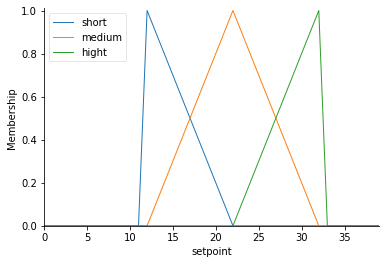

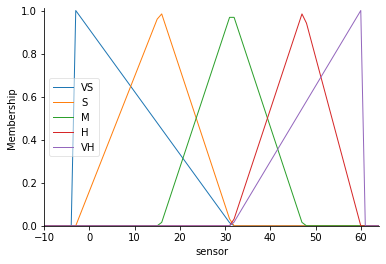

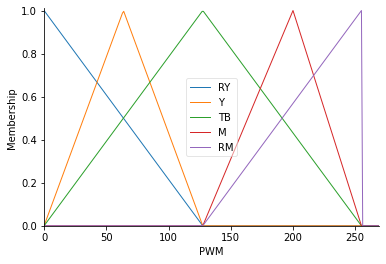

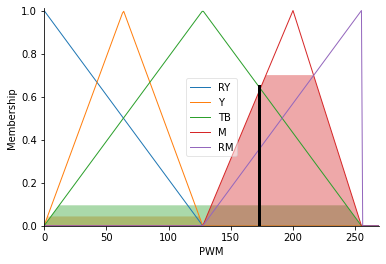

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import  control as ctrl


setpoint = ctrl.Antecedent(np.arange(0,40,1),'setpoint')
sensor = ctrl.Antecedent(np.arange(-10,65,1),'sensor')
PWM = ctrl.Consequent(np.arange(0,270,1),'PWM')

setpoint['short']= fuzz.trimf(setpoint.universe,[12,12,22])
setpoint['medium']= fuzz.trimf(setpoint.universe,[12,22,32])
setpoint['hight']= fuzz.trimf(setpoint.universe,[22,32,32])

sensor['VS']= fuzz.trimf(sensor.universe,[-3,-3,31.5])
sensor['S']= fuzz.trimf(sensor.universe,[-3,15.75,31.5])
sensor['M']= fuzz.trimf(sensor.universe,[15.75,31.5,47.25])
sensor['H']= fuzz.trimf(sensor.universe,[31.5,47.25,60])
sensor['VH']= fuzz.trimf(sensor.universe,[31.5,60,60])

PWM['RY']= fuzz.trimf(PWM.universe,[0,0,255/2])
PWM['Y']= fuzz.trimf(PWM.universe,[0,255/4,255/2])
PWM['TB']= fuzz.trimf(PWM.universe,[0,255/2,255])
PWM['M']= fuzz.trimf(PWM.universe,[255/2,200,255])
PWM['RM']= fuzz.trimf(PWM.universe,[255/2,255,255])

setpoint.view()
sensor.view()
PWM.view()

rule1 = ctrl.Rule(setpoint['short']&sensor['VS'],PWM['RY'])
rule2 = ctrl.Rule(setpoint['short']&sensor['S'],PWM['Y'])
rule3 = ctrl.Rule(setpoint['short']&sensor['M'],PWM['Y'])
rule4 = ctrl.Rule(setpoint['short']&sensor['H'],PWM['TB'])
rule5 = ctrl.Rule(setpoint['short']&sensor['VH'],PWM['TB'])

rule6 = ctrl.Rule(setpoint['medium']&sensor['VS'],PWM['Y'])
rule7 = ctrl.Rule(setpoint['medium']&sensor['S'],PWM['TB'])
rule8 = ctrl.Rule(setpoint['medium']&sensor['M'],PWM['M'])
rule9 = ctrl.Rule(setpoint['medium']&sensor['H'],PWM['M'])
rule10 = ctrl.Rule(setpoint['medium']&sensor['VH'],PWM['RM'])

rule11 = ctrl.Rule(setpoint['hight']&sensor['VS'],PWM['TB'])
rule12  = ctrl.Rule(setpoint['hight']&sensor['S'],PWM['M'])
rule13 = ctrl.Rule(setpoint['hight']&sensor['M'],PWM['M'])
rule14 = ctrl.Rule(setpoint['hight']&sensor['H'],PWM['RM'])
rule15 = ctrl.Rule(setpoint['hight']&sensor['VH'],PWM['RM'])

PWMing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
PWMing = ctrl.ControlSystemSimulation(PWMing_ctrl)
PWMing.input['setpoint']=25       
PWMing.input['sensor'] = 30  

PWMing.compute()

print(PWMing.output['PWM'])
PWM.view(sim = PWMing)